<a href="https://colab.research.google.com/github/carlosfmorenog/CMM536/blob/master/CMM536_Topic_5/CMM536_T5_Lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 5 - Methods to Address Class Imbalance

## Aims of the Session

* Understand the concept of class imbalance and how it affects the classification of data in general

* Learn how to implement some popular data-based methods to address this problem

## Resources for the Lecture

### Websites

* https://imbalanced-learn.readthedocs.io/en/stable/install.html
* https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html
* https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
* https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
* https://towardsdatascience.com/image-augmentation-for-deep-learning-histogram-equalization-a71387f609b2
* https://keras.io/preprocessing/image/
* https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Papers

* N. Japkowicz, S. Stephen, “The class imbalance problem: A systematic study,” Intelligent Data Analysis 6 (5) (2002) 429-449.
* J. Stefanowski, “Overlapping, Rare Examples and Class Decomposition in Learning Classifiers from Imbalanced Data,” in Emerging Paradigms in Machine Learning, Springer, Berlin, Heidelberg, 2013, pp. 277–306.
* C. Seiffert, T. M. Khoshgoftaar, J. Van Hulse, and A. Napolitano, “RUSBoost A Hybrid Approach to Alleviating Class Imbalance,” IEEE Transactions on Systems, Man and Cybernetics, Part A: Systems and Humans, vol. 40, no. 1, pp. 185–197, 2010.
* N. V. Chawla, K. W. Bowyer, L. O. Hall, and W. P. Kegelmeyer, “SMOTE: Synthetic minority over-sampling technique,” Journal of Artificial Intelligence Research, vol. 16, pp. 321–357, 2002.
* R. Vilalta, M.-K. Achari, and C. F. Eick, “Class decomposition via clustering: a new framework for low-variance classifiers,” Third IEEE International Conference on Data Mining, pp. 673–676, 2003.
* E. Elyan, M. M. Gaber, “A genetic algorithm approach to optimising random forests applied to class engineered data,” Information Sciences, Volume 384, April 2017
* E. Elyan, C. F. Moreno-García, C. Jayne, "CDSMOTE: class decomposition and synthetic minority class oversampling technique for imbalanced-data classification," Neural Computing Applications, 2020. Available from: https://doi.org/10.1007/s00521-020-05130-z

## What is class imbalance?

Last week we used the popular `IRIS` dataset, which contains $150$ samples of $3$ different iris plants

* Each class contains 50 samples, and therefore this dataset is **balanced**

* However this is **not** usually the case!

* Think about domains such as health sciences, the financial sector, cyber security and others

* Usually you collect a vast amount of samples that belong to one class, but not enough from the other one 

* Examples: Presence vs absence of a disease, valid vs invalid transactions, legit vs spam emails, etc...

### Formal definitions

* Assume we have a dataset with only two classes (i.e. a `binary` dataseet)

* This dataset is said to be **imbalanced** if one of the classes (i.e. `majority class`) outnumbers the other class (i.e. `minority class`)

* Often the majority class is known as the `negative` class, while the minority class is known as the `positive` class.

* We can calculate the `imbalance ratio` of this dataset by using the following formula:

$Imbalance Ratio = \frac{number\:of\:samples\:majority\:class}{number\:of\:samples\:minority\:class}$

* Example: A dataset with 100 samples of plant $A$ and 50 samples of plant $B$ would have an `imbalance ratio` of $IR = 2$

* As $IR$ becomes larger, the dataset is more imbalances and thus, harder to be **correctly** classified

### What do I mean by CORRECTLY classified?

* When designing a testing framework for a classifier, it is essential to select the correct **metrics**

* Still, it is important to flag the most common flaw when evaluating imbalance dataset classification

* If we *design* a classifier for a dataset with $IR=99$ which simply predicts all samples to be `negative`, then we will obtain an `accuracy` of $99\%$!

* Accuracy is **NOT** a good metric for imbalance dataset classification!

* We will talk about this in more detail in Topic 6

### Types of class imbalance methods

* `Data-based`: Resampling the data to generate a new dataset

* `Algorithmic-based`: Designing modified learning algorithms

* `Cost-sensitive`: Aimed at minimising the total cost considering the different class distributions

* Today we will focus on the first category

## Data-Based Imbalance Handling in Binary Datasets

* There are two main approaches to handle imbalance in binary datasets:

* `Undersampling`: Reducing the samples from the majority class

* `Oversampling`: Increasing the samples from the minority class

* We will use a test dataset called [breast_cancer](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset) to exemplify one method of each variety:

### Random Undersampling (RUS)

* This method, as the name says, consists in randomly undersampling the majority class to even the datasets

In [ ]:
# Loading the dataset
from sklearn.datasets import load_breast_cancer
import numpy as np
bc = load_breast_cancer()
# Remember that these datasets usually come in dictionary-like structures
# We can get the data and the target out
data = bc['data']
target = bc['target']
print(data)
print('The shape of the dataset is: ', data.shape)
print(target)
print('Number of negative cases (0): ', len(target)-np.count_nonzero(target))
print('Number of positive cases (1): ', np.count_nonzero(target))
print('Imbalance Ratio: ', np.count_nonzero(target)/(len(target)-np.count_nonzero(target)))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
The shape of the dataset is:  (569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 

* Now we can try to apply RUS to this dataset and see what happens:

In [ ]:
## First install the imblearn package if you don't have it already
!pip install imbalanced-learn

In [ ]:
## Now we apply RUS to the dataset
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42) # random state ensures we always get the same result
data_rus, target_rus = rus.fit_sample(data,target)

print(data_rus)
print('The shape of the dataset is: ', data_rus.shape)
print(target_rus)
print('Number of negative cases (0): ', len(target_rus)-np.count_nonzero(target_rus))
print('Number of positive cases (1): ', np.count_nonzero(target_rus))
print('Imbalance Ratio: ', np.count_nonzero(target_rus)/(len(target_rus)-np.count_nonzero(target_rus)))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.366e+01 1.515e+01 8.827e+01 ... 1.054e-01 3.387e-01 9.638e-02]
 [9.742e+00 1.912e+01 6.193e+01 ... 4.589e-02 3.196e-01 8.009e-02]
 [9.742e+00 1.567e+01 6.150e+01 ... 5.159e-02 2.841e-01 8.175e-02]]
The shape of the dataset is:  (424, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 

* Notice that by default, RUS balances the dataset to $IR=1$!

* There are variants to this method, such as RUSboost, which uses a boosting algorithm to `ensemble` better results

* There are numerous other undersampling methods such as Tomek Link, MUTE, etc.

#### PROS of Undersampling

* Removes redundant and outlier data (when correctly applied)

* Are easy to compute

#### CONS of Undersampling

* Data loss

* Not suitable when there are minimal minority class samples

### Synthetic minority oversampling technique (SMOTE)

* This method, developed by Chawla et al. is now state-of-the-art in the field

* Improves the presence of the minority class by creating artificial (synthetic) samples

* Uses supervised learning techniques, such as `k-Nearest Neighbours` (K-NN), for this purpose 

* SMOTE can also be imported in Python and used in few lines of code:

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
data_smote, target_smote = sm.fit_resample(data, target)
print(data_smote)
print('The shape of the dataset is: ', data_smote.shape)
print(target_smote)
print('Number of negative cases (0): ', len(target_smote)-np.count_nonzero(target_smote))
print('Number of positive cases (1): ', np.count_nonzero(target_smote))
print('Imbalance Ratio: ', np.count_nonzero(target_smote)/(len(target_smote)-np.count_nonzero(target_smote)))

[[1.79900000e+01 1.03800000e+01 1.22800000e+02 ... 2.65400000e-01
  4.60100000e-01 1.18900000e-01]
 [2.05700000e+01 1.77700000e+01 1.32900000e+02 ... 1.86000000e-01
  2.75000000e-01 8.90200000e-02]
 [1.96900000e+01 2.12500000e+01 1.30000000e+02 ... 2.43000000e-01
  3.61300000e-01 8.75800000e-02]
 ...
 [1.89802048e+01 2.07229208e+01 1.22740052e+02 ... 1.41613342e-01
  2.56907006e-01 6.16596202e-02]
 [1.55225881e+01 1.96461822e+01 1.01894239e+02 ... 1.50644626e-01
  3.08648911e-01 8.58466691e-02]
 [1.23891194e+01 2.08371158e+01 7.91858240e+01 ... 8.51229522e-02
  2.50807979e-01 7.63256983e-02]]
The shape of the dataset is:  (714, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0

* There are numerous variants such as `SVM-SMOTE`, `kmeansSMOTE`, `ADASYN`, `DBSMOTE`, `SMOTEBoost`, `CDSMOTE`, etc.

* I recommend you to read the paper by [Chawla et al.](https://arxiv.org/pdf/1106.1813.pdf) if you want to know exactly how it works

#### PROS of Oversampling

* Helps augment minority data, which is usually what you want!

#### CONS of Oversampling

* "Harder" to compute

* Synthetic examples may be redundant/outliers

## Data-Based Imbalance Handling in Non-Binary Datasets

* All the aforementioned methods have variants that are applicable for non-binary datasets

* However, in non-binary datasets usually there are different class sizes and it is unclear which is the minority/majority class

* In that regard, there is a special category of balancing methods that can be applied to non-binary datasets, which also mitigate the disadvantages of both oversampling and undersampling

### Class Decomposition

* This method does not replicate or loses data, but rather creates more classes based on **unsupervised learning**/**clustering**

* By changing the **target**, we ensure that the subclasses are more balanced

* At the classification stage we need to make sure that the model understands this change!

* Example contained in [Vilalta et al. 2003](https://www.semanticscholar.org/paper/Class-decomposition-via-clustering%3A-a-new-framework-Vilalta-Achari/619807bb022e20f1ed8b6aca36f74e7500a0ba9a)

![Fig 1. Class decomposition](https://www.dropbox.com/s/p498fxpm5q7r8t6/classdec.png?raw=1)

#### Basic principles

* A dataset $D=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$, where $x$ is the *feature vector* and $y$ is the target

* Assume that $y$ can take two values: $\color{red}{red}$ and $\color{blue}{blue}$ 

* If we cannot find a *classification* function that correctly maps X to Y, then we can **rearrange** the data

$Y_c = \{Dark\:\color{red}{red},Light\:\color{red}{red},Dark\:\color{blue}{blue},Light\:\color{blue}{blue}\}$

* Now we need a function that maps $h_c : X \rightarrow Y_c$

#### But first, how do we "know" which classes to decompose?

* Depending on the **number of samples** and the **quality of the initial classification**

* Maybe there are more samples of red than blue

* Maybe classification was good with blue already!

* If you want to achieve balance i.e. $IR \approx 1$ then you can use the following **standard balancing equation**:

$k_i = [\frac{c_i}{A_{vg}}+1]$

* where:
    * $k_i$ is the number of clusters
    * $c_i$ is the total number of instances of a specific class
    * $A_{vg}$ is the mean class distribution

#### Example

* A repository with data has 5 classes:

* Class 0: 11100 samples
* Class 1: 1899 samples
* Class 2: 353 samples
* Class 3: 12987 samples
* Class 4: 3471 samples

In [ ]:
## First we calculate Avg
classdist = [11100,1899,353,12987,3471]
Avg = sum(classdist)/len(classdist)
print('Avg: ', Avg)
## Then we can calculate ki for each class
for i,c in enumerate(classdist):
    print('k_'+str(i)+'=', (c/Avg)+1)

Avg:  5962.0
k_0= 2.8617913451861794
k_1= 1.3185172760818518
k_2= 1.0592083193559207
k_3= 3.1782958738678295
k_4= 1.5821871855082188


* If $k_i$ is **smaller than 2**, then no clustering is needed

* If $k_i$ is **larger than 2**, then you `floor` the obtained value and you get the clusters needed 

In [ ]:
import math
## Calculating the number of clusters to decompose each class
for i,c in enumerate(classdist):
    print('Clusters for class '+str(i)+':', math.floor((c/Avg)+1))

Clusters for class 0: 2
Clusters for class 1: 1
Clusters for class 2: 1
Clusters for class 3: 3
Clusters for class 4: 1


#### Class decomposition in an artificial dataset

In [ ]:
## Creating the data (class 0)
import numpy as np
class0 = np.random.rand(11100,2)
class0 = np.concatenate((class0,np.zeros((11100,1))),axis=1)
print(class0, class0.shape)

[[0.78721067 0.46803019 0.        ]
 [0.86189989 0.11792469 0.        ]
 [0.97109041 0.56896674 0.        ]
 ...
 [0.70411205 0.41906615 0.        ]
 [0.28246956 0.53184207 0.        ]
 [0.45711406 0.62019367 0.        ]] (11100, 3)


In [ ]:
## Creating the rest of the data
class1 = np.random.rand(1899,2)*10 # multiply to get distinct values
class1 = np.concatenate((class1,np.ones((1899,1))),axis=1)
class2 = np.random.rand(353,2)*100
class2 = np.concatenate((class2,np.ones((353,1))+1),axis=1)
class3 = np.random.rand(12987,2)*10000
class3 = np.concatenate((class3,np.ones((12987,1))+2),axis=1)
class4 = np.random.rand(3471,2)/100
class4 = np.concatenate((class4,np.ones((3471,1))+3),axis=1)
repo = np.vstack((class0,class1,class2,class3,class4))
print(repo, repo.shape)

[[7.87210675e-01 4.68030186e-01 0.00000000e+00]
 [8.61899888e-01 1.17924692e-01 0.00000000e+00]
 [9.71090413e-01 5.68966741e-01 0.00000000e+00]
 ...
 [6.37271998e-03 4.24828522e-03 4.00000000e+00]
 [7.26853429e-03 2.37293146e-03 4.00000000e+00]
 [8.34560454e-03 6.53733294e-03 4.00000000e+00]] (29810, 3)


In [ ]:
# Dark themed plots!
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

(array([11100.,  1899.,   353., 12987.,  3471.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

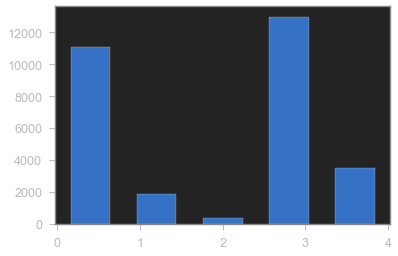

In [ ]:
# Plotting the histogram of the class distribution
import matplotlib.pyplot as plt
plt.hist(repo[:,2],bins=5,ec='white', rwidth=0.6)

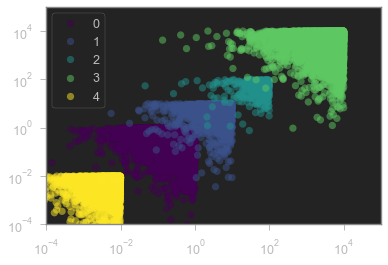

In [ ]:
# Plotting the data
scatter = plt.scatter(repo[:,0], repo[:,1], c=repo[:,-1], alpha=0.5)
plt.xlim(0.0001, 100000)
plt.ylim(0.0001, 100000)
plt.xscale('log')
plt.yscale('log')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.show()

In [ ]:
# How to access data and target from a certain class
X = repo[np.where(repo[:,2]==0)][:,:2]
y = repo[np.where(repo[:,2]==0)][:,2]
print(X,X.shape)
print(y,y.shape)

[[0.78721067 0.46803019]
 [0.86189989 0.11792469]
 [0.97109041 0.56896674]
 ...
 [0.70411205 0.41906615]
 [0.28246956 0.53184207]
 [0.45711406 0.62019367]] (11100, 2)
[0. 0. 0. ... 0. 0. 0.] (11100,)


In [ ]:
#How to use Kmeans 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(X)
kmeans.labels_

array([4, 4, 3, ..., 1, 1, 1])

In [ ]:
## Putting all together
from sklearn.cluster import KMeans

for i,c in enumerate(classdist):
    X = repo[np.where(repo[:,-1]==i)][:,:2] # Find instances of the class
    y = np.zeros((c,1))+i
    nclusters = math.floor((c/Avg)+1) # Calculate number of clusters
    print('Clusters to decompose class '+str(i)+':', nclusters)    
    if nclusters>1:        
        kmeans = KMeans(n_clusters=nclusters).fit(X)
        ## add to the last column decimals for the new class
        for j,n in enumerate(X):
            y[j]=y[j]+(kmeans.labels_[j]/10) # divide by 10 so that it gets added as decimal
        print('Decomposed version of class '+str(i)+':')
        print(np.concatenate((X,y),axis=1))
    if i==0: # If this is the first time, copy the first class into a new repo
        repo_decomp = np.concatenate((X,y),axis=1).copy()
    else: # stack the new into the existing
        repo_decomp = np.vstack((repo_decomp,np.concatenate((X,y),axis=1)))
print('Decomposed repo')
print(repo_decomp)

Clusters to decompose class 0: 2
Decomposed version of class 0:
[[0.78721067 0.46803019 0.        ]
 [0.86189989 0.11792469 0.        ]
 [0.97109041 0.56896674 0.1       ]
 ...
 [0.70411205 0.41906615 0.        ]
 [0.28246956 0.53184207 0.1       ]
 [0.45711406 0.62019367 0.1       ]]
Clusters to decompose class 1: 1
Clusters to decompose class 2: 1
Clusters to decompose class 3: 3
Decomposed version of class 3:
[[6.71388354e+03 7.00694029e+03 3.00000000e+00]
 [2.16520855e+03 8.04877498e+03 3.00000000e+00]
 [7.77360417e+03 6.85948769e+03 3.00000000e+00]
 ...
 [8.99705576e+03 2.92981485e+03 3.10000000e+00]
 [5.14325417e+03 2.87917879e+03 3.10000000e+00]
 [6.24402403e+03 8.61359892e+03 3.00000000e+00]]
Clusters to decompose class 4: 1
Decomposed repo
[[7.87210675e-01 4.68030186e-01 0.00000000e+00]
 [8.61899888e-01 1.17924692e-01 0.00000000e+00]
 [9.71090413e-01 5.68966741e-01 1.00000000e-01]
 ...
 [6.37271998e-03 4.24828522e-03 4.00000000e+00]
 [7.26853429e-03 2.37293146e-03 4.00000000e+

(array([5520., 5580.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1899.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  353.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 4777., 4149., 4061.,    0.,    0.,    0.,
           0.,    0.,    0., 3471.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. ]),
 <BarContainer object of 40 artists>)

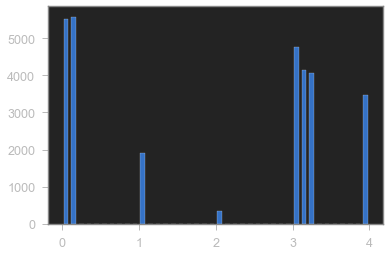

In [ ]:
# Plotting the histogram of the new class distribution
plt.hist(repo_decomp[:,2],bins=40,ec='white', rwidth=0.6)

In [ ]:
# I do this since 0 and 0.1 are too close
# If I plot them, colour difference will be null
# Therefore I change 0.1 for 5, 3.1 for 6 and 3.2 for 7
colours = repo_decomp[:,-1].copy()
colours = np.where(colours==0.1, 5, colours)
colours = np.where(colours==3.1, 6, colours)
colours = np.where(colours==3.2, 7, colours)

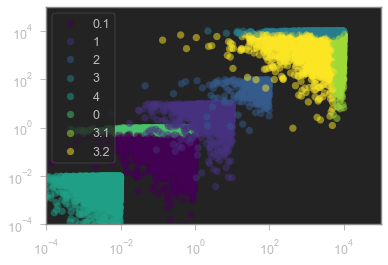

In [ ]:
# Plotting the decomposed data
scatter2 = plt.scatter(repo_decomp[:,0], repo_decomp[:,1], c=colours, alpha=0.5)
plt.xlim(0.0001, 100000)
plt.ylim(0.0001, 100000)
plt.xscale('log')
plt.yscale('log')
plt.legend(handles=scatter2.legend_elements()[0], labels=[0.1,1,2,3,4,0,3.1,3.2])
plt.show()

#### Classification of a Decomposed Dataset

* Should you decompose **before** or **after** the split?

* How should you consider metric success? e.g. if a $Dark\:\color{red}{red}$ sample gets classified as a $Light\:\color{red}{red}$ one 

* Notice that this is not the only way to do class decomposition, there are numerous ways to do it!

* You can check [Elyan & Gaber 2017](https://rgu-repository.worktribe.com/output/246044) paper to see an advanced approach

* This method uses `Random Forests` and `genetic algorithms`

### Image Augmentation

* In the particular case of images, we can also recur to creating synthetic/artificial images

* This process relies on image transformation functions and properties

* Examples: DIY, affine transform, `Tensorflow`/`Keras` (deep learning frameworks), Genarative Adversarial Networks (GANs), etc.

![Fig 2. Image Augmentation](https://www.dropbox.com/s/40ribd6hmymuz7b/imgaug.png?raw=1)

# LAB